In [2]:
# Installing required packages
!pip install pandas ipython-sql sqlalchemy --quiet

In [4]:
# Importing Python libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import prettytable
from prettytable import TableStyle

In [6]:
# Fixing prettytable style error
prettytable.DEFAULT = TableStyle.PLAIN_COLUMNS

In [8]:
# Loading SQL magic
%load_ext sql

# Connecting SQL magic to SQLite database
%sql sqlite:///movies.db

In [10]:
# Loading CSV into pandas
df = pd.read_csv("netflix_data.csv")

In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [18]:
#Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [22]:
# Filtering for movies only
df_movies = df[df['type'].str.lower() == 'movie'].copy()

In [48]:
# Save cleaned DataFrame to SQLite
conn = sqlite3.connect('movies.db')
df.to_sql('movies', conn, if_exists='replace', index=False)

4812

In [34]:
%%sql
-- Most Frequent Movie Duration in the 1990s

SELECT duration, COUNT(*) AS count
FROM movies
WHERE type = 'Movie'
  AND release_year BETWEEN 1990 AND 1999
GROUP BY duration
ORDER BY count DESC
LIMIT 1;

 * sqlite:///movies.db
Done.


duration,count
94,7


In [36]:
%%sql
-- Count of Short Action Movies (< 90 minutes) Released in 1990s

SELECT COUNT(*) AS short_movie_count
FROM movies
WHERE type = 'Movie'
  AND release_year BETWEEN 1990 AND 1999
  AND LOWER(genre) LIKE '%action%'
  AND duration < 90;

 * sqlite:///movies.db
Done.


short_movie_count
7


In [38]:
%%sql
--Top 5 Most Common Genres in 1990s Movies

SELECT genre, COUNT(*) AS count
FROM movies
WHERE type = 'Movie'
  AND release_year BETWEEN 1990 AND 1999
GROUP BY genre
ORDER BY count DESC
LIMIT 5;

 * sqlite:///movies.db
Done.


genre,count
Action,48
Dramas,44
Comedies,40
Classic Movies,15
Children,15


In [40]:
%%sql
--Country Producing the Most 1990s Movies on Netflix

SELECT country, COUNT(*) AS count
FROM movies
WHERE type = 'Movie'
  AND release_year BETWEEN 1990 AND 1999
GROUP BY country
ORDER BY count DESC
LIMIT 1;

 * sqlite:///movies.db
Done.


country,count
United States,99


In [42]:
%%sql
--Average Movie Duration by Genre (1990s Movies)

SELECT genre, ROUND(AVG(duration), 2) AS avg_duration
FROM movies
WHERE type = 'Movie'
  AND release_year BETWEEN 1990 AND 1999
GROUP BY genre
ORDER BY avg_duration DESC;

 * sqlite:///movies.db
Done.


genre,avg_duration
Dramas,132.05
Classic Movies,128.73
Action,120.15
Comedies,110.7
Thrillers,109.2
Horror Movies,104.75
Cult Movies,100.0
Children,93.07
Documentaries,72.0
Stand-Up,53.25


In [44]:
%%sql
--Directors with the Most 1990s Movies on Netflix

SELECT director, COUNT(*) AS count
FROM movies
WHERE type = 'Movie'
  AND release_year BETWEEN 1990 AND 1999
  AND director != ''
GROUP BY director
ORDER BY count DESC
LIMIT 5;

 * sqlite:///movies.db
Done.


director,count
Johnnie To,4
Youssef Chahine,3
Umesh Mehra,3
Subhash Ghai,3
Sooraj R. Barjatya,3


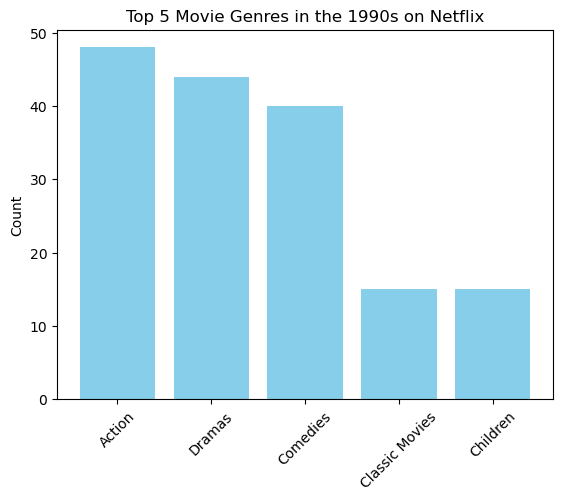

In [50]:
#Plotting the top 5 genres
query = """
SELECT genre, COUNT(*) AS count
FROM movies
WHERE type = 'Movie'
  AND release_year BETWEEN 1990 AND 1999
GROUP BY genre
ORDER BY count DESC
LIMIT 5;
"""

top_genres = pd.read_sql(query, conn)
plt.bar(top_genres['genre'], top_genres['count'], color='skyblue')
plt.title('Top 5 Movie Genres in the 1990s on Netflix')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [52]:
conn.close()